<a href="https://colab.research.google.com/github/aisudev/CNN-10Animal-Classifier/blob/main/CNN_10AnimalType.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade gdown
!gdown --id 19IdEt38P11Vo2FMCxWs6QC2xkmBFiGsu

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=6df379523dbf7cce44cf76a0d2ed6a1dc2ffdedb886d359864a7a3a8470e6639
  Stored in directory: /root/.cache/pip/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.1
    Uninstalling gdown-4.2.1:
      Successfully uninstalled gdown-4.2.1
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=19IdEt38P11Vo2FMCxWs6QC2xkmBFiGsu
To: /content/animals-10classes.zip
100% 614M/614M [00:06<00:00, 88.2MB/s]


In [2]:
!unzip -qq ./animals-10classes.zip

## Prepare Data

In [3]:
from pathlib import Path
data_dir = './raw-img/'
data_path = Path(data_dir)
animal_types = [str(name).split('/')[-1] for name in data_path.glob('*')]
animal_types

['ragno',
 'gallina',
 'gatto',
 'mucca',
 'cane',
 'scoiattolo',
 'farfalla',
 'cavallo',
 'pecora',
 'elefante']

In [4]:
from tqdm.notebook import tqdm
import cv2
import numpy as np

translates = {
    "cane": "dog", 
    "cavallo": "horse", 
    "elefante": "elephant", 
    "farfalla": "butterfly", 
    "gallina": "chicken", 
    "gatto": "cat", 
    "mucca": "cow", 
    "pecora": "sheep", 
    "scoiattolo": "squirrel", 
    "ragno":"spider", 
    }

img_size = (260, 260)
labels = []
images_path = []


for at in animal_types:
  dir = data_dir + at + '/'
  path = Path(dir)
  for img_path in tqdm((path.glob('*'))):
    img_path = str(img_path)
    images_path.append(img_path)
    img = cv2.imread(img_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    labels.append(translates[at])

labels = np.array(labels)
images_path = np.array(images_path)

labels.shape, images_path.shape

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

((26179,), (26179,))

In [5]:
import matplotlib.pyplot as plt


def show_images(idx, images, labels, col, figsize=(20, 10)):
  n_col = col
  n_row = len(idx) // col

  _, axs = plt.subplots(n_row, n_col, figsize=figsize)
  n = 0
  for  row in axs:
    for col in row:
      col.imshow(images[idx[n]])
      col.set_title(labels[idx[n]])
      n += 1
  

In [6]:
import pandas as pd

df = pd.DataFrame({
    'animal':labels,
    'path':images_path
})

df.head()

animal                                               path
0  spider  raw-img/ragno/OIP-laH5qkXsz7fKVOgk2Z5mAgHaFj.jpeg
1  spider  raw-img/ragno/OIP-zXN2eacA63WItpYMZQsjWQHaE-.jpeg
2  spider  raw-img/ragno/OIP-MmB9gn8-sdjLQTpPv6ik3AEsDw.jpeg
3  spider  raw-img/ragno/OIP-EnxF5XDX-FIvwii221kMKAHaGC.jpeg
4  spider  raw-img/ragno/OIP-IE9PFbZ1DiJROiPEUMZ2mgHaF0.jpeg

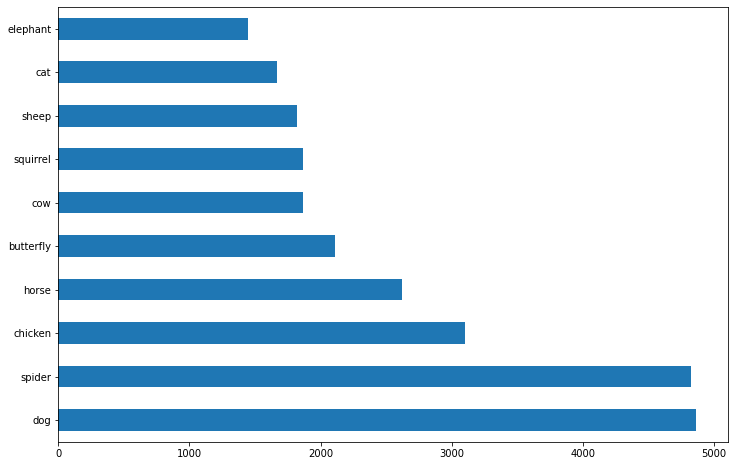

In [7]:
df.animal.value_counts().plot.barh(figsize=(12, 8))

In [8]:
from tqdm.notebook import tqdm
cut_ind = df.animal.value_counts().min()
types = np.unique(labels)

images_data = []
labels_data = []
resize = (260, 260)

for t in tqdm(types):
  n = 0
  for ind, row in df[df['animal'] == t].iterrows():
    img = cv2.imread(row.path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, resize)
    images_data.append(img)
    labels_data.append(t)
    n += 1
    if n == cut_ind:
      break

images_data = np.array(images_data)
labels_data = np.array(labels_data)

images_data.shape, labels_data.shape

  0%|          | 0/10 [00:00<?, ?it/s]

((14460, 260, 260, 3), (14460,))

In [9]:
cut_df = pd.DataFrame({
    'animal':labels_data
})

cut_df.animal.value_counts()

butterfly    1446
cat          1446
chicken      1446
cow          1446
dog          1446
elephant     1446
horse        1446
sheep        1446
spider       1446
squirrel     1446
Name: animal, dtype: int64

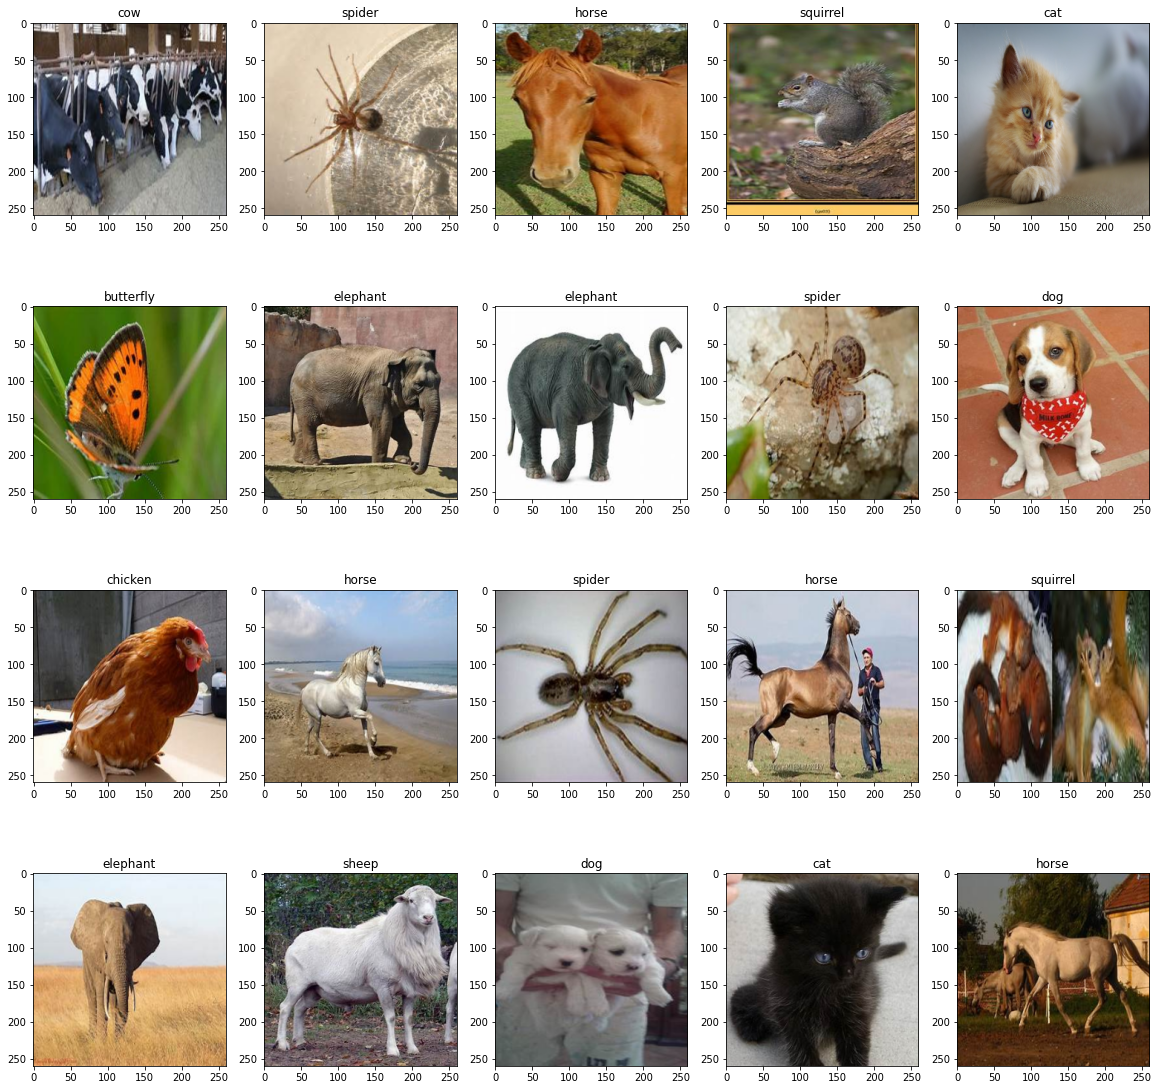

In [10]:
n_show = 20
rand_idx = np.random.randint(0, len(images_data), n_show)
show_images(rand_idx, images_data, labels_data, 5, figsize=(20, 20))

## Image Augmented

In [11]:
def bgr2rgb(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#### zoom function

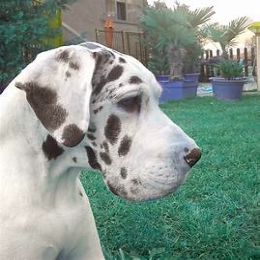

In [18]:
import random
from google.colab.patches import cv2_imshow
def zoom(img, ratio):
  # if 0 >= ratio <= 1:
  #   return img
  # (h, w) = img.shape[:2]

  # limY = int(h * ratio)
  # limX = int(w * ratio)

  # startX = random.randint(0, limX)
  # startY = random.randint(0, limY)

  # endX = startX + limX
  # endY = startY + limY
  
  # img = img[startY:endY, startX:endX, :]
  # img = cv2.resize(img, (h, w))
  # return bgr2rgb(img)
  return img

test_img = zoom(images_data[6661], 0.5)
cv2_imshow(test_img)

### Flip Image

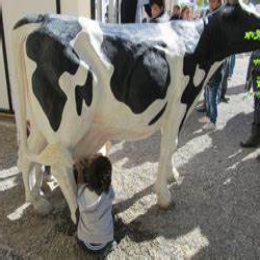

In [13]:
def flip(img, axis=1):
  img = cv2.flip(img, axis)
  return bgr2rgb(img)

test_img = flip(images_data[5555], 1)
cv2_imshow(test_img)

### Channel Shift

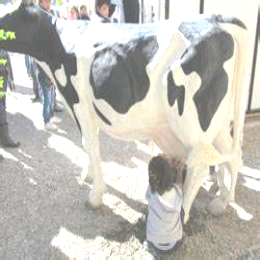

In [14]:
import random

def channel_shift(img, value):
  value = random.uniform(-value, value) 
  img = img + value
  img[:, :, :][img[:, :, :] > 255] = 255
  img[:, :, :][img[:, :, :] < 0] = 0
  img = img.astype(np.uint8)
  return bgr2rgb(img)

test_img = channel_shift(images_data[5555], 100)
cv2_imshow(test_img)

### Add Noise

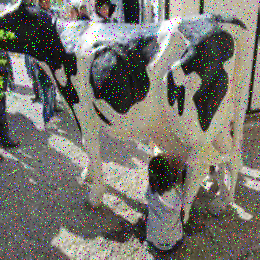

In [15]:
from skimage.util import random_noise
def noise(img):
  img = random_noise(img, mode='s&p', amount=.05) * 255
  img = img.astype(np.uint8)
  return bgr2rgb(img)

test_img = noise(images_data[5555])
cv2_imshow(test_img)

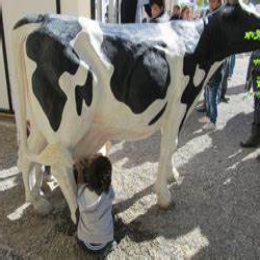

In [16]:
def random_augs(img):
  uses = np.random.choice(4, 3)
  uses = np.unique(uses)
  for i in uses:
    if i == 0:
      img = zoom(img, 2)
    elif i == 1:
      img = flip(img)
    elif i == 2:
      img = channel_shift(img, 80)
    elif i == 3:
      img = noise(img)
  return img
test_img = random_augs(images_data[5555])
cv2_imshow(test_img)

In [19]:
aug_images = []
for img in tqdm(images_data):
  aug_images.append(random_augs(img))

aug_images = np.array(aug_images)
aug_images.shape

  0%|          | 0/14460 [00:00<?, ?it/s]

(14460, 260, 260, 3)

In [20]:
images = np.concatenate([images_data, aug_images])
labels = np.concatenate([labels_data, labels_data])
images.shape, labels.shape

((28920, 260, 260, 3), (28920,))

## Modeling

In [21]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
labels = encoder.fit_transform(labels.reshape(-1, 1)).ravel()
labels = np.eye(np.unique(labels).shape[0])[np.array(labels, dtype=np.uint8)]
labels[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=.4, shuffle=True, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((17352, 260, 260, 3), (11568, 260, 260, 3), (17352, 10), (11568, 10))

In [23]:
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=.5, shuffle=True, random_state=42)
x_val.shape, x_test.shape, y_val.shape, y_test.shape

((5784, 260, 260, 3), (5784, 260, 260, 3), (5784, 10), (5784, 10))

In [24]:
from tensorflow.keras.applications import EfficientNetB2
from tensorflow import keras

model = keras.Sequential([
                          EfficientNetB2(weights="imagenet"),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

model.summary()

37445632/37432240 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 1000)             9177569   
                                                                 
 dense (Dense)               (None, 128)               128128    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 9,316,363
Trainable params: 9,248,788
Non-trainable params: 67,575
__________________________________________

In [25]:
history = model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
543/543 [==============================] - 206s 338ms/step - loss: 1.1476 - accuracy: 0.6651 - val_loss: 0.6769 - val_accuracy: 0.7948
Epoch 2/10
543/543 [==============================] - 179s 329ms/step - loss: 0.5247 - accuracy: 0.8411 - val_loss: 0.5273 - val_accuracy: 0.8482
Epoch 3/10
543/543 [==============================] - 179s 329ms/step - loss: 0.3592 - accuracy: 0.8937 - val_loss: 0.3330 - val_accuracy: 0.9065
Epoch 4/10
543/543 [==============================] - 179s 329ms/step - loss: 0.2384 - accuracy: 0.9295 - val_loss: 0.3280 - val_accuracy: 0.9125
Epoch 5/10
543/543 [==============================] - 178s 329ms/step - loss: 0.2230 - accuracy: 0.9356 - val_loss: 0.3495 - val_accuracy: 0.9049
Epoch 6/10
543/543 [==============================] - 179s 330ms/step - loss: 0.1809 - accuracy: 0.9491 - val_loss: 0.2657 - val_accuracy: 0.9222
Epoch 7/10
543/543 [==============================] - 179s 330ms/step - loss: 0.1605 - accuracy: 0.9553 - val_loss: 0.3408 -

In [27]:
y_hat = model.predict(x_test)
y_hat[:5]

array([[5.04518039e-06, 8.90075607e-05, 3.12194497e-05, 1.65808501e-06,
        7.99253030e-05, 1.64707858e-09, 1.33120575e-05, 1.83405544e-04,
        1.06407415e-05, 9.99585807e-01],
       [4.93624157e-07, 2.66845254e-05, 3.08070594e-04, 9.69969869e-01,
        4.84943064e-03, 2.59266165e-03, 1.71536300e-02, 5.06940950e-03,
        1.17330928e-05, 1.81493961e-05],
       [9.60531365e-03, 1.01217881e-01, 6.55324711e-03, 5.57494443e-03,
        9.80018452e-02, 2.48432945e-04, 2.01263726e-02, 1.27427019e-02,
        9.77684744e-03, 7.36152470e-01],
       [3.49181682e-05, 1.12422895e-05, 9.98866081e-01, 8.11007267e-05,
        1.84164615e-04, 8.49320641e-05, 1.40239717e-05, 5.78573032e-04,
        2.07635767e-05, 1.24102866e-04],
       [9.98633683e-01, 2.34844592e-05, 2.76503386e-04, 3.58454137e-08,
        2.14382781e-05, 4.03967242e-05, 9.88458269e-05, 5.90592890e-07,
        8.17676599e-04, 8.73155368e-05]], dtype=float32)

In [28]:
def convertToResult(oh):
  tmp = []
  for x in oh:
    tmp.append(np.argmax(x))
  return tmp

In [29]:
y_hat = convertToResult(y_hat)
y_test = convertToResult(y_test)
y_hat[:10], y_test[:10]

([9, 3, 9, 2, 0, 1, 7, 3, 0, 0], [9, 3, 9, 2, 0, 1, 7, 3, 0, 0])

In [30]:
def id2name(id):
  return encoder.categories_[0][id]

In [31]:
y_hat = [id2name(id) for id in y_hat]
y_test = [id2name(id) for id in y_test]
y_hat[:5], y_test[:5]

(['squirrel', 'cow', 'squirrel', 'chicken', 'butterfly'],
 ['squirrel', 'cow', 'squirrel', 'chicken', 'butterfly'])

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_hat)

0.9484785615491009

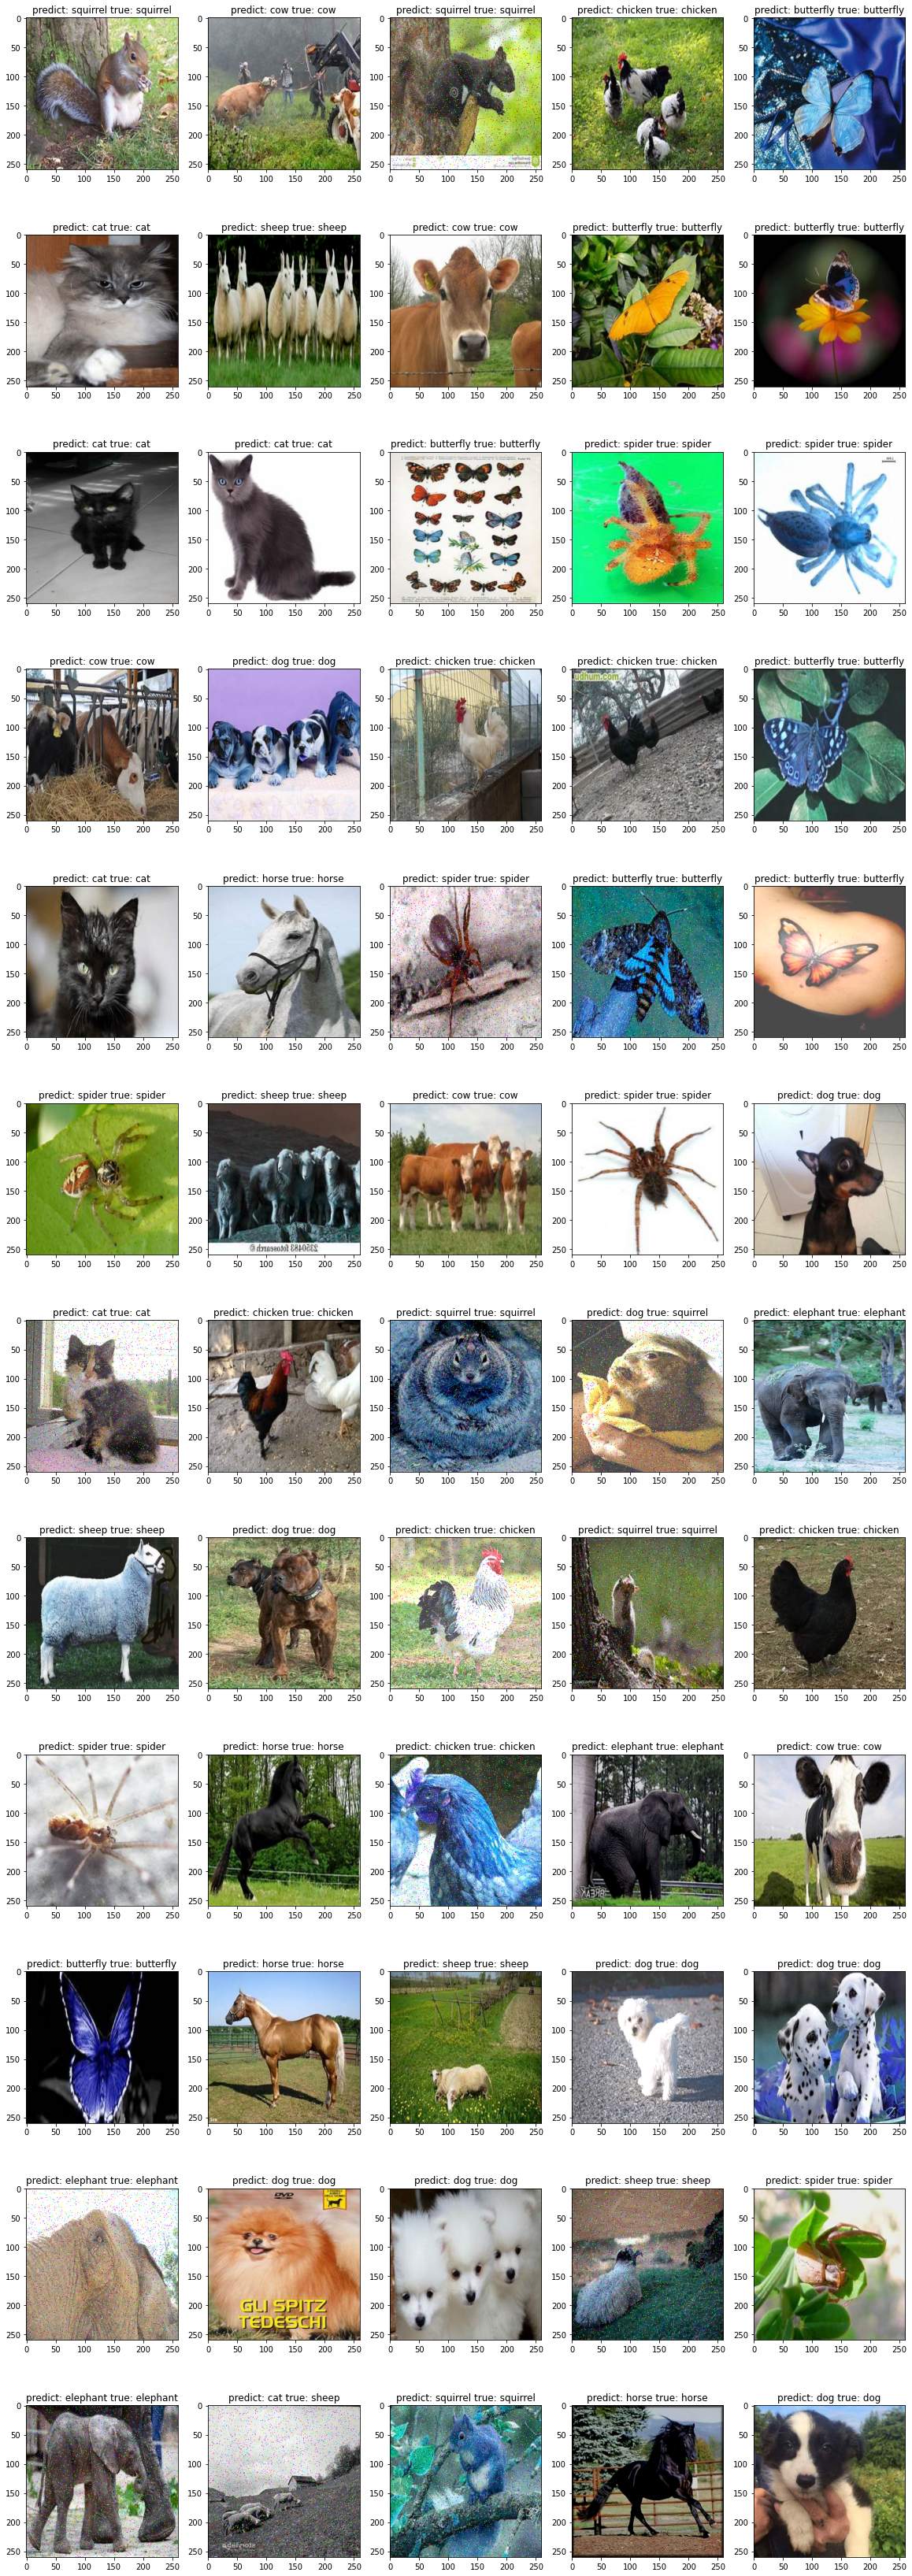

In [33]:
_, axs = plt.subplots(12, 5, figsize=(20, 60))

n = 0
for row in axs:
  for col in row:
    col.imshow(x_test[n])
    col.set_title('predict: ' + y_hat[n] + ' true: ' + y_test[n])
    n += 1
plt.show()